In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
import xgboost as xgb
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error as mse
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import scale
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LassoCV
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import BaggingRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error as mse
# import ml_metrics as metrics
import re
import matplotlib.pyplot as plt
from sklearn.metrics import average_precision_score as m_a_p
from sklearn import metrics
from metrics import *
import copy as copy
import seaborn as sns
from sklearn import svm

In [136]:
# Caculate the root mean square rooot
def RMSE(predictions, targets):

    differences = predictions - targets                       #the DIFFERENCEs.

    differences_squared = differences ** 2                    #the SQUAREs of ^

    mean_of_differences_squared = differences_squared.mean()  #the MEAN of ^

    rmse_val = np.sqrt(mean_of_differences_squared)           #ROOT of ^

    return rmse_val     #get the ^

In [77]:
def rmse(y_true, y_pred):
    return np.sqrt(mse(y_true, y_pred))

In [6]:
All_df = pd.read_csv('/Users/osx/Desktop/web-datamining/IRDM/Data/cleaning_data.csv')
groud_truth = pd.read_csv('/Users/osx/Desktop/web-datamining/IRDM/Data/Label.csv')

In [7]:
All_df['query_brand_in_brand_score'] = All_df['query_brand_in_brand_convoluted']
All_df['query_brand_in_all_score'] = All_df['query_brand_in_all_convoluted']
All_df['query_brand_in_title_score'] = All_df['query_brand_in_title_convoluted']
All_df['query_material_in_material_score'] = All_df['query_material_in_material_convoluted']
All_df['query_brand_in_description_score'] = All_df['query_brand_in_description_convoluted']
All_df['query_brand_in_bullets_score'] = All_df['query_brand_in_bullets_convoluted']
All_df['query_material_in_all_score'] = All_df['query_material_in_all_convoluted']
All_df['query_material_in_title_score'] = All_df['query_material_in_title_convoluted']
All_df['query_material_in_description_score'] = All_df['query_material_in_description_convoluted']
All_df['query_material_in_bullets_score'] = All_df['query_material_in_bullets_convoluted']

In [8]:
cleaning_features_drop = ['has_attributes_dummy','query_brand_in_brand_convoluted',
                         'query_brand_in_all_convoluted',
                         'query_brand_in_title_convoluted',
                         'query_material_in_material_convoluted',
                         'query_brand_in_description_convoluted',
                         'query_brand_in_bullets_convoluted',
                         'query_material_in_all_convoluted',
                         'query_material_in_title_convoluted',
                         'query_material_in_description_convoluted',
                         'query_material_in_bullets_convoluted', 
                         'tfidf_nn_important_in_title_num',
                         'tfidf_nn_important_in_description_num',
                         'tfidf_nn_important_in_bullets_num',
                         'tfidf_nn_important_in_title_let',
                         'tfidf_nn_important_in_description_let',
                         'tfidf_nn_important_in_bullets_let',
                         'tfidf_nn_unimportant_in_title_num',
                         'tfidf_nn_unimportant_in_description_num',
                         'tfidf_nn_unimportant_in_bullets_num',
                         'tfidf_nn_unimportant_in_title_let',
                         'tfidf_nn_unimportant_in_description_let',
                         'tfidf_nn_unimportant_in_bullets_let', 
                         'tfidf_title_querythekey_num',
                         'tfidf_title_querybeforethekey_num',
                         'tfidf_title_querythekey_let',
                         'tfidf_title_querybeforethekey_let', 
                         'thekey_beforethekey_pathsimilarity_max',
                         'thekey_beforethekey_pathsimilarity_mean',
                         'thekey_beforethekey_lchsimilarity_max',
                         'thekey_beforethekey_lchsimilarity_mean',
                         'thekey_beforethekey_ressimilarity_max',
                         'thekey_beforethekey_ressimilarity_mean',
                         'thekey_before2thekey_pathsimilarity_max',
                         'thekey_before2thekey_pathsimilarity_mean',
                         'thekey_before2thekey_lchsimilarity_max',
                         'thekey_before2thekey_lchsimilarity_mean',
                         'thekey_before2thekey_ressimilarity_max',
                         'thekey_before2thekey_ressimilarity_mean',
                         'thekey_beforethekeys_pathsimilarity_max',
                         'thekey_beforethekeys_pathsimilarity_mean',
                         'thekey_beforethekeys_lchsimilarity_max',
                         'thekey_beforethekeys_lchsimilarity_mean',
                         'thekey_beforethekeys_ressimilarity_max',
                         'thekey_beforethekeys_ressimilarity_mean',
                         'beforethekey_thekey_pathsimilarity_max',
                         'beforethekey_thekey_pathsimilarity_mean',
                         'beforethekey_thekey_lchsimilarity_max',
                         'beforethekey_thekey_lchsimilarity_mean',
                         'beforethekey_thekey_ressimilarity_max',
                         'beforethekey_thekey_ressimilarity_mean', 
                         'beforethekeys_pathsimilarity_max',
                         'beforethekeys_pathsimilarity_mean',
                         'beforethekeys_lchsimilarity_max',
                         'beforethekeys_lchsimilarity_mean',
                         'beforethekeys_ressimilarity_max',
                         'beforethekeys_ressimilarity_mean', 
                         'thekey_in_nn_important_in_description_sum',
                         'thekey_in_nn_important_in_description_let',
                         'thekey_in_nn_important_in_bullets_sum',
                         'thekey_in_nn_important_in_bullets_let',
                         'thekey_in_thekey',
                         'beforethekey_in_beforethekey',
                         'beforethekeys_in_beforethekeys',
                         'thekey_in_beforethekeys',
                         'beforethekeys_in_thekey', 
                         'beforethekey_in_description_sum',
                         'beforethekey_in_description_let',
                         'beforethekey_in_bullets_sum',
                         'beforethekey_in_bullets_let', 
                         'nn_important_in_bullets_num',
                         'nn_important_in_bullets_sum',
                         'nn_important_in_bullets_let',
                         'nn_important_in_bullets_numratio',
                         'nn_important_in_bullets_letratio',
                         'nn_unimportant_in_bullets_num',
                         'nn_unimportant_in_bullets_let',
                         'nn_unimportant_in_bullets_letratio',
                         'nn_important_in_nn_important_in_bullets_num',
                         'nn_important_in_nn_important_in_bullets_sum',
                         'nn_important_in_nn_important_in_bullets_let',
                         'nn_important_in_nn_important_in_bullets_letratio',
                         'nn_important_in_nn_unimportant_in_bullets_num',
                         'nn_important_in_nn_unimportant_in_bullets_sum',
                         'nn_important_in_nn_unimportant_in_bullets_let',
                         'nn_important_in_nn_unimportant_in_bullets_letratio',
                         'nn_unimportant_in_nn_important_in_bullets_num',
                         'nn_unimportant_in_nn_important_in_bullets_sum',
                         'nn_unimportant_in_nn_important_in_bullets_let',
                         'nn_unimportant_in_nn_important_in_bullets_letratio', 
                         'wordFor_in_bullets_string_only_num',
                         'wordFor_in_bullets_string_only_let',
                         'wordFor_in_bullets_string_only_letratio',
                         'wordWith_in_bullets_string_only_num',
                         'wordWith_in_bullets_string_only_let',
                         'wordWith_in_bullets_string_only_letratio', 
                         'nn_important_in_description_num',
                         'nn_important_in_description_sum',
                         'nn_important_in_description_let',
                         'nn_important_in_description_numratio',
                         'nn_important_in_description_letratio',
                         'nn_unimportant_in_description_num',
                         'nn_unimportant_in_description_let',
                         'nn_unimportant_in_description_letratio',
                         'nn_important_in_nn_important_in_description_num',
                         'nn_important_in_nn_important_in_description_sum',
                         'nn_important_in_nn_important_in_description_let',
                         'nn_important_in_nn_important_in_description_letratio',
                         'nn_important_in_nn_unimportant_in_description_num',
                         'nn_important_in_nn_unimportant_in_description_sum',
                         'nn_important_in_nn_unimportant_in_description_let',
                         'nn_important_in_nn_unimportant_in_description_letratio',
                         'nn_unimportant_in_nn_important_in_description_num',
                         'nn_unimportant_in_nn_important_in_description_sum',
                         'nn_unimportant_in_nn_important_in_description_let',
                         'nn_unimportant_in_nn_important_in_description_letratio', 
                         'wordFor_in_description_string_only_num',
                         'wordFor_in_description_string_only_let',
                         'wordFor_in_description_string_only_letratio',
                         'wordWith_in_description_string_only_num',
                         'wordWith_in_description_string_only_let',
                         'wordWith_in_description_string_only_letratio',
                         'nn_important_in_title_num',
                         'nn_important_in_title_sum',
                         'nn_important_in_title_let',
                         'nn_important_in_title_numratio',
                         'nn_important_in_title_letratio',
                         'nn_unimportant_in_title_num',
                         'nn_unimportant_in_title_let',
                         'nn_unimportant_in_title_letratio',
                         'nn_important_in_nn_important_in_title_num',
                         'nn_important_in_nn_important_in_title_sum',
                         'nn_important_in_nn_important_in_title_let',
                         'nn_important_in_nn_important_in_title_letratio',
                         'nn_important_in_nn_unimportant_in_title_num',
                         'nn_important_in_nn_unimportant_in_title_sum',
                         'nn_important_in_nn_unimportant_in_title_let',
                         'nn_important_in_nn_unimportant_in_title_letratio',
                         'nn_unimportant_in_nn_important_in_title_num',
                         'nn_unimportant_in_nn_important_in_title_sum',
                         'nn_unimportant_in_nn_important_in_title_let',
                         'nn_unimportant_in_nn_important_in_title_letratio', 
                         'wordFor_in_title_string_only_num',
                         'wordFor_in_title_string_only_let',
                         'wordFor_in_title_string_only_letratio',
                         'wordWith_in_title_string_only_num',
                         'wordWith_in_title_string_only_let',
                         'wordWith_in_title_string_only_letratio', 
                         'ratio_of_nn_important_in_attribute_bullets',
                         'ratio_of_nn_unimportant_in_attribute_bullets', 
                         'ratio_of_nn_important_in_product_description',
                         'ratio_of_nn_unimportant_in_product_description', 
                         'ratio_of_nn_important_in_product_title',
                         'ratio_of_nn_unimportant_in_product_title', 
                         'ratio_of_nn_important_in_search_term',
                         'ratio_of_nn_unimportant_in_search_term', 
                         'search_term_thekey',
                         'search_term_beforethekey',
                         'search_term_before2thekey',
                         'attribute_bullets_stemmed',
                         'attribute_bullets_stemmed_woBM',
                         'attribute_bullets_stemmed_woBrand',
                         'search_term_keys_stemmed',
                         'product_title_keys_stemmed',
                         'search_term_stemmed',
                         'search_term_stemmed_woBM',
                         'search_term_stemmed_woBrand',
                         'product_title_stemmed',
                         'product_title_stemmed_woBM',
                         'product_title_stemmed_woBrand',
                         'search_term_thekey_stemmed',
                         'product_title_thekey_stemmed',
                         'search_term_beforethekey_stemmed',
                         'product_title_beforethekey_stemmed',
                         'search_term_before2thekey_stemmed',
                         'product_title_before2thekey_stemmed', 
                         'search_term_parsed_woBrand',
                         'brands_in_search_term',
                         'search_term_parsed_woBM',
                         'materials_in_search_term',
                         'product_title_parsed_woBrand',
                         'brands_in_product_title',
                         'product_title_parsed_woBM',
                         'materials_in_product_title',
                         'search_term_tokens',
                         'product_title_tokens',
                         'attribute_bullets_parsed',
                         'search_term_for',
                         'search_term_for_stemmed',
                         'search_term_with',
                         'search_term_with_stemmed',
                         'product_title_parsed_without',
                         'product_title_without_stemmed',
                         'attribute_bullets_parsed_woBrand',
                         'brands_in_attribute_bullets',
                         'attribute_bullets_parsed_woBM',
                         'materials_in_attribute_bullets',
                         'attribute_bullets_tokens',
                         'product_title_cut',
                         'product_title_cut_woBrand',
                         'product_title_cut_tokens',
                         'product_title_cut_wordtokens',
                         'search_term_cut_woBrand',
                         'search_term_cut_tokens',
                         'search_term_cut_wordtokens',
                         'search_term_keys',
                         'product_title_keys',
                         'product_title_thekey',
                         'product_title_beforethekey',
                         'product_title_before2thekey', 
                         'product_title_simpleparsed',
                         'search_term_simpleparsed',
                         'search_term_parsed',
                         'search_term_parsed_wospellcheck',
                         'product_title_parsed',
                         'brand_parsed',
                         'Material',
                         'material_parsed', 'Color',
                         'Bullet',
                         'product_description',
                         'Brand',
                         'product_title',
                         'product_description_parsed',
                         'product_description_parsed_woBrand',     
                         'brands_in_product_description',          
                         'product_description_parsed_woBM',        
                         'materials_in_product_description',       
                         'product_description_tokens',             
                         'product_description_stemmed',            
                         'product_description_stefxmmed_woBM',     
                         'product_description_stemmed_woBrand',    
                         'key_for_dict','product_uid']

In [9]:
All_df = All_df.drop(cleaning_features_drop,axis=1)

In [10]:
All_df = All_df.drop('Unnamed: 0',axis=1)
All_df['Product Height (in.)'] = All_df['Product Height (in.)'].fillna(0)
All_df['Product Width (in.)'] = All_df['Product Width (in.)'].fillna(0)
All_df['Product Depth (in.)'] = All_df['Product Depth (in.)'].fillna(0)
All_df['Product Weight (lb.)'] = All_df['Product Weight (lb.)'].fillna(0)
All_df['Product Length (in.)'] = All_df['Product Length (in.)'].fillna(0)

In [11]:
All_df = All_df.drop('Product Height (in.)',axis=1)
All_df = All_df.drop('Product Width (in.)',axis=1)
All_df = All_df.drop('Product Depth (in.)',axis=1)
All_df = All_df.drop('Product Weight (lb.)',axis=1)
All_df = All_df.drop('Product Length (in.)',axis=1)

In [12]:
All_df = All_df.fillna(0)

In [13]:
All_df['Indoor/Outdoor'][All_df['Indoor/Outdoor']=='Indoor']=2
All_df['Indoor/Outdoor'][All_df['Indoor/Outdoor']=='Indoor/Outdoor']=1.5
All_df['Indoor/Outdoor'][All_df['Indoor/Outdoor']=='Outdoor']=1
All_df['Indoor/Outdoor'][All_df['Indoor/Outdoor']=='Indoor,Outdoor']=1.
All_df['Indoor/Outdoor'][All_df['Indoor/Outdoor']=='Indoor/Outdoor (Covered)']=1.5
All_df['Commercial / Residential'][All_df['Commercial / Residential']=='Commercial / Residential']=1.5
All_df['Commercial / Residential'][All_df['Commercial / Residential']=='Residential']=1
All_df['Commercial / Residential'][All_df['Commercial / Residential']=='Commercial']=2
All_df['ENERGY STAR Certified'][All_df['ENERGY STAR Certified']=='No']=0
All_df['ENERGY STAR Certified'][All_df['ENERGY STAR Certified']=='Yes']=1
All_df['Hardware Included'][All_df['Hardware Included']=='Yes']=1
All_df['Hardware Included'][All_df['Hardware Included']=='No']=0

In [14]:
All_df['Hardware Included'] = All_df['Hardware Included'].astype(float)
All_df['Indoor/Outdoor'] = All_df['Hardware Included'].astype(float)
All_df['Commercial / Residential'] = All_df['Hardware Included'].astype(float)
All_df['ENERGY STAR Certified'] = All_df['Hardware Included'].astype(float)

In [15]:
### training data
clean_train = All_df[0:74067]
y = clean_train['relevance']
cleaned_train = clean_train.drop('relevance',axis=1)
cleaned_train = cleaned_train.drop('id',axis=1)
cleaned_train = cleaned_train.drop('search_term',axis=1)
### test data
clean_test = All_df[74067:]

clean_test = clean_test.drop('relevance',axis=1)
clean_test = pd.merge(clean_test,groud_truth, on='id')

In [16]:
### delete ingored in solution
II = clean_test[clean_test['Usage']=='Ignored'].index
clean_test = clean_test.drop(II, axis=0)
clean_test = clean_test.drop('Usage',axis=1)
y_truth = clean_test['relevance']
total_map=clean_test
clean_test = clean_test.drop('search_term',axis=1)
clean_test = clean_test.drop('relevance',axis=1)
cleaned_test = clean_test.drop('id',axis=1)

### Linear Regressor

In [412]:
### Lasso model
perform_lasso = []
num_alpha = np.array([100,200,300,500,600,700,800,900,1000])
for i in num_alpha:
    R_lasso = LassoCV(eps=0.001, \
                      n_alphas=i, \
                      alphas=None, fit_intercept=True, \
                      normalize=False, precompute='auto', \
                      max_iter=1000, tol=0.0001, \
                      copy_X=True, cv=10, verbose=False, \
                      n_jobs=1, positive=False, random_state=None, selection='cyclic')
    r_l_model = R_lasso.fit(cleaned_train,y)
    pre_y = r_l_model.predict(cleaned_test)
    perform_lasso.append(rmse(y_truth,pre_y))
    print('n_alphas:',i)
    print(' ')

n_alphas: 100
 
n_alphas: 200
 
n_alphas: 300
 
n_alphas: 500
 
n_alphas: 600
 
n_alphas: 700
 
n_alphas: 800
 
n_alphas: 900
 
n_alphas: 1000
 


In [413]:
perform_lasso

[0.47008475720455833,
 0.47008475720455833,
 0.47008475720455833,
 0.47008475720455833,
 0.47008475720455833,
 0.47008475720455833,
 0.47008475720455833,
 0.47008475720455833,
 0.47008475720455833]

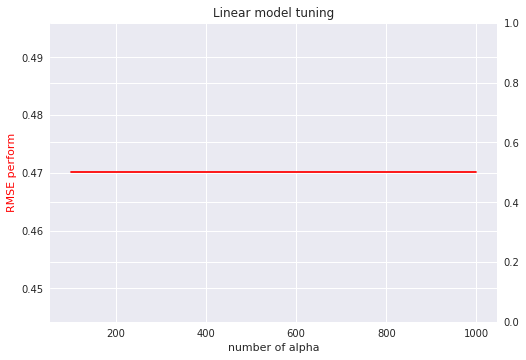

In [414]:
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.plot(num_alpha, perform_lasso, 'r-')
# ax2.plot(budget, cpc, 'b-')

ax1.set_xlabel('number of alpha')
ax1.set_ylabel('RMSE perform', color='r')
# ax2.set_ylabel('CPC improvement', color='b')
plt.title('Linear model tuning')
plt.show()

In [415]:
### map value
total_map['pre_relevance'] = pre_y
test_map = total_map.sort_values(['search_term','relevance'], ascending=[True, False])
pred_map = total_map.sort_values(['search_term','pre_relevance'], ascending=[True, False])
for k in np.arange(1,11,1):
    test_k = test_map.groupby(by='search_term', sort=False).id.apply( lambda x: x.values[:k].tolist()).values.tolist()
    pred_all = pred_map.groupby(by='search_term', sort=False).id.apply( lambda x: x.values.tolist()).values.tolist()
    MAP_score = mapk(test_k, pred_all,k)
    print("MAP_top_",k,":", MAP_score)

MAP_top_ 1 : 0.443922995882
MAP_top_ 2 : 0.592867062542
MAP_top_ 3 : 0.678242292671
MAP_top_ 4 : 0.735495881621
MAP_top_ 5 : 0.781287552278
MAP_top_ 6 : 0.822948259532
MAP_top_ 7 : 0.862280634886
MAP_top_ 8 : 0.897786093115
MAP_top_ 9 : 0.929550280597
MAP_top_ 10 : 0.95535009646


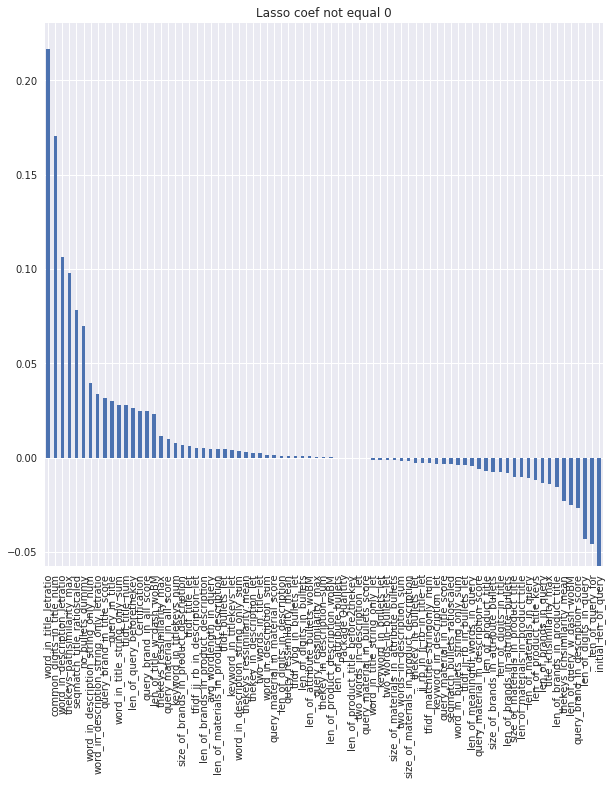

In [416]:
#================Plot==================
importances=pd.Series(r_l_model.coef_[r_l_model.coef_!=0.0],index=cleaned_train.columns[r_l_model.coef_!=0.0])
importances.sort_values(inplace=True,ascending=False)
importances.plot(kind="bar", figsize=(10,10));
plt.title('Lasso coef not equal 0')
plt.show()
#---------------------------------------------------

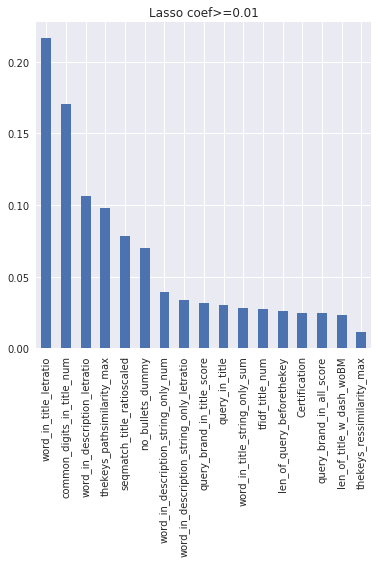

In [417]:
#================Plot==================
importances=pd.Series(r_l_model.coef_[r_l_model.coef_>=0.01],index=cleaned_train.columns[r_l_model.coef_>=0.01])
importances.sort_values(inplace=True,ascending=False)
importances.plot(kind="bar", figsize=(6,6));
plt.title('Lasso coef>=0.01')
plt.show()
#---------------------------------------------------

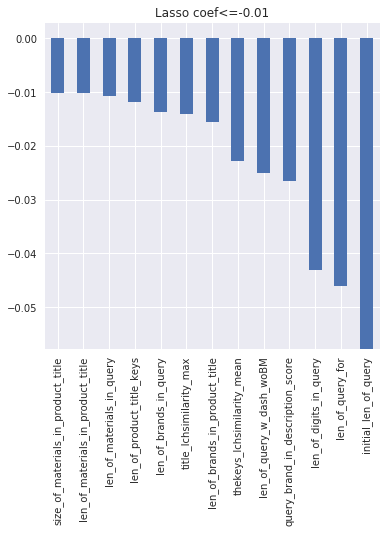

In [418]:
#================Plot==================
importances=pd.Series(r_l_model.coef_[r_l_model.coef_<=-0.01],index=cleaned_train.columns[r_l_model.coef_<=-0.01])
importances.sort_values(inplace=True,ascending=False)
importances.plot(kind="bar", figsize=(6,6));
plt.title('Lasso coef<=-0.01')
plt.show()
#---------------------------------------------------

In [419]:
### Ridge
alp = np.array([0.3,0.5,0.7,0.9,1.5])
max_it = np.array([100,300,500,600,700,800,900,1000])
perform_ridge = []
for i in alp:
    for j in max_it:
        Rid = Ridge(alpha=i, fit_intercept=True, normalize=False, \
              copy_X=True, max_iter=j, tol=0.001, \
              solver='auto', random_state=None)
        Ridge_model = Rid.fit(cleaned_train,y)
        pre_y = Ridge_model.predict(cleaned_test)
        perform_ridge.append(rmse(y_truth,pre_y))
        print('alp:',i)
        print('max_it:',j)
        print(' ')

alp: 0.3
max_it: 100
 
alp: 0.3
max_it: 300
 
alp: 0.3
max_it: 500
 
alp: 0.3
max_it: 600
 
alp: 0.3
max_it: 700
 
alp: 0.3
max_it: 800
 
alp: 0.3
max_it: 900
 
alp: 0.3
max_it: 1000
 
alp: 0.5
max_it: 100
 
alp: 0.5
max_it: 300
 
alp: 0.5
max_it: 500
 
alp: 0.5
max_it: 600
 
alp: 0.5
max_it: 700
 
alp: 0.5
max_it: 800
 
alp: 0.5
max_it: 900
 
alp: 0.5
max_it: 1000
 
alp: 0.7
max_it: 100
 
alp: 0.7
max_it: 300
 
alp: 0.7
max_it: 500
 
alp: 0.7
max_it: 600
 
alp: 0.7
max_it: 700
 
alp: 0.7
max_it: 800
 
alp: 0.7
max_it: 900
 
alp: 0.7
max_it: 1000
 
alp: 0.9
max_it: 100
 
alp: 0.9
max_it: 300
 
alp: 0.9
max_it: 500
 
alp: 0.9
max_it: 600
 
alp: 0.9
max_it: 700
 
alp: 0.9
max_it: 800
 
alp: 0.9
max_it: 900
 
alp: 0.9
max_it: 1000
 
alp: 1.5
max_it: 100
 
alp: 1.5
max_it: 300
 
alp: 1.5
max_it: 500
 
alp: 1.5
max_it: 600
 
alp: 1.5
max_it: 700
 
alp: 1.5
max_it: 800
 
alp: 1.5
max_it: 900
 
alp: 1.5
max_it: 1000
 


In [420]:
# mapk
total_map['pre_relevance'] = pre_y
test_map = total_map.sort_values(['search_term','relevance'], ascending=[True, False])
pred_map = total_map.sort_values(['search_term','pre_relevance'], ascending=[True, False])
for k in np.arange(1,11,1):
    test_k = test_map.groupby(by='search_term', sort=False).id.apply( lambda x: x.values[:k].tolist()).values.tolist()
    pred_all = pred_map.groupby(by='search_term', sort=False).id.apply( lambda x: x.values.tolist()).values.tolist()
    MAP_score = mapk(test_k, pred_all,k)
    print("MAP_top_",k,":", MAP_score)

MAP_top_ 1 : 0.445742744948
MAP_top_ 2 : 0.593800881142
MAP_top_ 3 : 0.679367663804
MAP_top_ 4 : 0.73580216614
MAP_top_ 5 : 0.781175494046
MAP_top_ 6 : 0.822720524854
MAP_top_ 7 : 0.862014220495
MAP_top_ 8 : 0.897563220887
MAP_top_ 9 : 0.929462234421
MAP_top_ 10 : 0.955195212555


In [421]:
perform 

[0.4771456629530193,
 0.46884423746478904,
 0.46628638742730338,
 0.4641807959838023,
 0.45838532357777423,
 0.47717419398064653,
 0.47008475720455833,
 0.47008475720455833,
 0.47008475720455833,
 0.47008475720455833,
 0.47008475720455833,
 0.47008475720455833,
 0.47008475720455833,
 0.47008475720455833,
 0.47008475720455833]

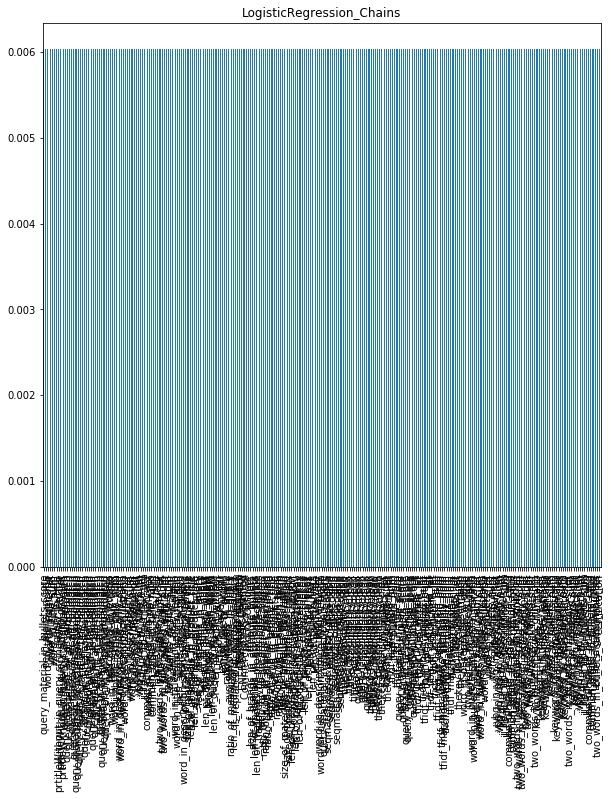

In [304]:
#================Plot==================
importances=pd.Series(Ridge_model.coef_[2],index=cleaned_train.columns)
importances.sort_values(inplace=True,ascending=False)
importances.plot(kind="bar", figsize=(10,10));
plt.title('LogisticRegression_Chains')
plt.show()

#------------------------------------------------------------

### Random Forest Regressor

In [422]:
n_es = np.array([100,500,300])
max_dep = np.array([3,5,6,7,15])
perform_rf = []
map_rf = []
for i in n_es:
    for j in max_dep:
        R_rf = RandomForestRegressor(n_estimators=i, criterion='mse', max_depth=j,\
                              min_samples_split=2, min_samples_leaf=12, min_weight_fraction_leaf=0.0,\
                              max_features=0.55, max_leaf_nodes=None, min_impurity_split=1e-07,\
                              bootstrap=True, oob_score=False, n_jobs=1, \
                              random_state=2017, verbose=0, warm_start=False)
        r_rf_model = R_rf.fit(cleaned_train,y)
        pre_y = r_rf_model.predict(cleaned_test)
        # mapk
        total_map['pre_relevance'] = pre_y
        test_map = total_map.sort_values(['search_term','relevance'], ascending=[True, False])
        pred_map = total_map.sort_values(['search_term','pre_relevance'], ascending=[True, False])
        test_k = test_map.groupby(by='search_term', sort=False).id.apply( lambda x: x.values[:3].tolist()).values.tolist()
        pred_all = pred_map.groupby(by='search_term', sort=False).id.apply( lambda x: x.values.tolist()).values.tolist()
        MAP_score = mapk(test_k, pred_all,3)
#         print("MAP_top_",3,":", MAP_score)
        map_rf.append(MAP_score)
        perform_rf.append(rmse(y_truth,pre_y))
        print('n_estimators:',i)
        print('max_depth:',j)
        print(' ')

n_estimators: 100
max_depth: 3
 
n_estimators: 100
max_depth: 5
 
n_estimators: 100
max_depth: 6
 
n_estimators: 100
max_depth: 7
 
n_estimators: 100
max_depth: 15
 
n_estimators: 500
max_depth: 3
 
n_estimators: 500
max_depth: 5
 
n_estimators: 500
max_depth: 6
 
n_estimators: 500
max_depth: 7
 
n_estimators: 500
max_depth: 15
 
n_estimators: 300
max_depth: 3
 
n_estimators: 300
max_depth: 5
 
n_estimators: 300
max_depth: 6
 
n_estimators: 300
max_depth: 7
 
n_estimators: 300
max_depth: 15
 


In [ ]:
map_rf

In [426]:
perform_rf

[0.4771456629530193,
 0.46884423746478904,
 0.46628638742730338,
 0.4641807959838023,
 0.45838532357777423,
 0.47717419398064653,
 0.46888699129102851,
 0.46626637246457403,
 0.46419954781898282,
 0.45778827074155348,
 0.4771580993578089,
 0.46889443432003725,
 0.4662521774391678,
 0.46417266857284251,
 0.45786091758544867]

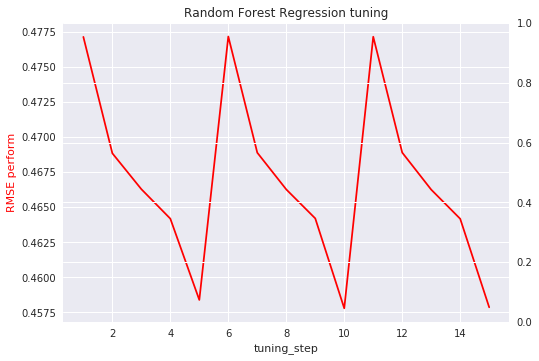

In [429]:
tun_step = np.array([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15])

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.plot(tun_step, perform_rf, 'r-')
# ax2.plot(budget, cpc, 'b-')

ax1.set_xlabel('tuning_step')
ax1.set_ylabel('RMSE perform', color='r')
# ax2.set_ylabel('CPC improvement', color='b')
plt.title('Random Forest Regression tuning')
plt.show()

In [434]:
R_rf_best = RandomForestRegressor(n_estimators=500, criterion='mse', max_depth=15,\
                              min_samples_split=2, min_samples_leaf=12, min_weight_fraction_leaf=0.0,\
                              max_features=0.55, max_leaf_nodes=None, min_impurity_split=1e-07,\
                              bootstrap=True, oob_score=False, n_jobs=1, \
                              random_state=2017, verbose=0, warm_start=False)
r_rf_model_best = R_rf_best.fit(cleaned_train,y)
pre_y = r_rf_model_best.predict(cleaned_test)

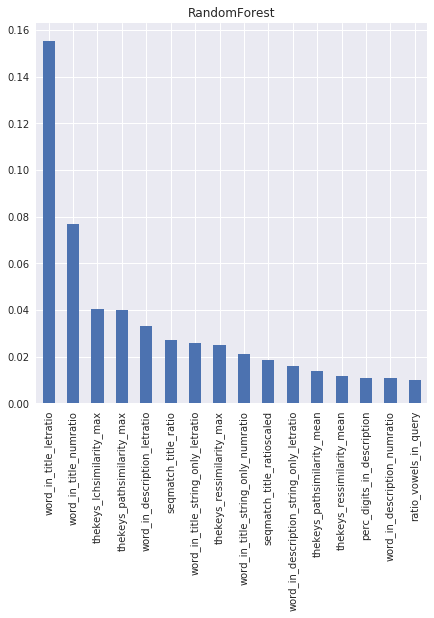

In [439]:
importances=pd.Series(r_rf_model_best.feature_importances_[r_rf_model_best.feature_importances_>=0.01],\
                      index=cleaned_train.columns[r_rf_model_best.feature_importances_>=0.01])
importances.sort_values(inplace=True,ascending=False)
importances.plot(kind="bar", figsize=(7,7));
plt.title('RandomForest')
plt.show()

In [440]:
# mapk
total_map['pre_relevance'] = pre_y
test_map = total_map.sort_values(['search_term','relevance'], ascending=[True, False])
pred_map = total_map.sort_values(['search_term','pre_relevance'], ascending=[True, False])
for k in np.arange(1,11,1):
    test_k = test_map.groupby(by='search_term', sort=False).id.apply( lambda x: x.values[:k].tolist()).values.tolist()
    pred_all = pred_map.groupby(by='search_term', sort=False).id.apply( lambda x: x.values.tolist()).values.tolist()
    MAP_score = mapk(test_k, pred_all,k)
    print("MAP_top_",k,":", MAP_score)

MAP_top_ 1 : 0.442390575615
MAP_top_ 2 : 0.592460013409
MAP_top_ 3 : 0.678529621471
MAP_top_ 4 : 0.73501201194
MAP_top_ 5 : 0.780527088721
MAP_top_ 6 : 0.822605460311
MAP_top_ 7 : 0.86197095829
MAP_top_ 8 : 0.897759490972
MAP_top_ 9 : 0.929507377644
MAP_top_ 10 : 0.95518423059


### XGBoosting 

In [449]:
ga = np.array([0.0,0.1])
max_dep = np.array([6,9,5])
n_es = np.array([165,295,596])
perform_xgb = []
map_xgb = []
for i in ga:
    for j in max_dep:
        for f in n_es:
            XGB = xgb.XGBRegressor(colsample_bytree=0.2,
                                                   gamma=i, 
                                                   learning_rate=0.01,
                                                   max_depth=j,
                                                   min_child_weight=1.5,
                                                   n_estimators=f,                                                                  
                                                   reg_alpha=0.9,
                                                   reg_lambda=0.7,
                                                   subsample=0.2,
                                                   seed=42,
                                                   silent=1)
            xgb_model = XGB.fit(cleaned_train,y)
            pre_y = xgb_model.predict(cleaned_test)
            # mapk
            total_map['pre_relevance'] = pre_y
            test_map = total_map.sort_values(['search_term','relevance'], ascending=[True, False])
            pred_map = total_map.sort_values(['search_term','pre_relevance'], ascending=[True, False])
            test_k = test_map.groupby(by='search_term', sort=False).id.apply( lambda x: x.values[:3].tolist()).values.tolist()
            pred_all = pred_map.groupby(by='search_term', sort=False).id.apply( lambda x: x.values.tolist()).values.tolist()
            MAP_score = mapk(test_k, pred_all,3)
#             print("MAP_top_",3,":", MAP_score)
            map_xgb.append(MAP_score)
            perform_xgb.append(rmse(y_truth,pre_y))
            print('n_estimators:',f)
            print('max_depth:',j)
            print('gamma:',i)
            print(' ')

n_estimators: 165
max_depth: 6
gamma: 0.0
 
n_estimators: 295
max_depth: 6
gamma: 0.0
 
n_estimators: 596
max_depth: 6
gamma: 0.0
 
n_estimators: 165
max_depth: 9
gamma: 0.0
 
n_estimators: 295
max_depth: 9
gamma: 0.0
 
n_estimators: 596
max_depth: 9
gamma: 0.0
 
n_estimators: 165
max_depth: 5
gamma: 0.0
 
n_estimators: 295
max_depth: 5
gamma: 0.0
 
n_estimators: 596
max_depth: 5
gamma: 0.0
 
n_estimators: 165
max_depth: 6
gamma: 0.1
 
n_estimators: 295
max_depth: 6
gamma: 0.1
 
n_estimators: 596
max_depth: 6
gamma: 0.1
 
n_estimators: 165
max_depth: 9
gamma: 0.1
 
n_estimators: 295
max_depth: 9
gamma: 0.1
 
n_estimators: 596
max_depth: 9
gamma: 0.1
 
n_estimators: 165
max_depth: 5
gamma: 0.1
 
n_estimators: 295
max_depth: 5
gamma: 0.1
 
n_estimators: 596
max_depth: 5
gamma: 0.1
 


In [450]:
map_xgb

[0.68034937053709199,
 0.67955123498174919,
 0.68049569538890475,
 0.67953793272249352,
 0.67860677457459373,
 0.6804531281592866,
 0.67951132820398219,
 0.67925060392257008,
 0.67957783950026063,
 0.6800301163149548,
 0.6794927050410241,
 0.68067128521108022,
 0.6793942683225318,
 0.67913886494482223,
 0.67986516830018406,
 0.67928518979663499,
 0.67861475593014708,
 0.67949802594472641]

In [452]:
perform_xgb

[0.59300703207748373,
 0.47343402865950035,
 0.4583026143906746,
 0.59357380899378487,
 0.47226181736202277,
 0.45671867829772289,
 0.59348640741613368,
 0.47450693767690777,
 0.45938682561478961,
 0.59298204910950592,
 0.47343929642509275,
 0.45829261964868245,
 0.59345121022909131,
 0.47221182484048951,
 0.45659534942327723,
 0.59348234731774319,
 0.47453304567725973,
 0.45939436251664184]

In [ ]:
tun_step = np.array([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18])

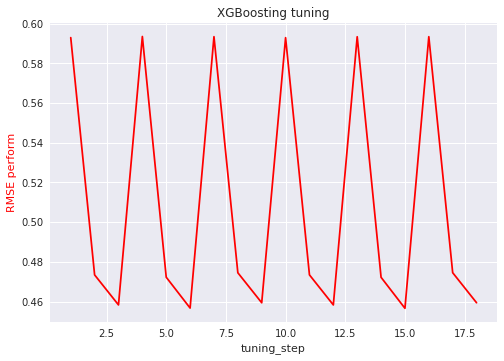

In [456]:
fig, ax1 = plt.subplots()

#ax2 = ax1.twinx()
ax1.plot(tun_step, perform_xgb, 'r-')
# ax2.plot(budget, cpc, 'b-')

ax1.set_xlabel('tuning_step')
ax1.set_ylabel('RMSE perform', color='r')
# ax2.set_ylabel('CPC improvement', color='b')
plt.title('XGBoosting tuning')
plt.show()

In [458]:
XGB_best = xgb.XGBRegressor(colsample_bytree=0.2,
                       gamma=0.1, 
                       learning_rate=0.01,
                       max_depth=9,
                       min_child_weight=1.5,
                       n_estimators=596,                                                                  
                       reg_alpha=0.9,
                       reg_lambda=0.7,
                       subsample=0.2,
                       seed=42,
                       silent=1)
xgb_model_best = XGB_best.fit(cleaned_train,y)
pre_y = xgb_model_best.predict(cleaned_test)

In [459]:
# mapk
total_map['pre_relevance'] = pre_y
test_map = total_map.sort_values(['search_term','relevance'], ascending=[True, False])
pred_map = total_map.sort_values(['search_term','pre_relevance'], ascending=[True, False])
for k in np.arange(1,11,1):
    test_k = test_map.groupby(by='search_term', sort=False).id.apply( lambda x: x.values[:k].tolist()).values.tolist()
    pred_all = pred_map.groupby(by='search_term', sort=False).id.apply( lambda x: x.values.tolist()).values.tolist()
    MAP_score = mapk(test_k, pred_all,k)
    print("MAP_top_",k,":", MAP_score)

MAP_top_ 1 : 0.445311751748
MAP_top_ 2 : 0.594495259075
MAP_top_ 3 : 0.6798651683
MAP_top_ 4 : 0.736793849567
MAP_top_ 5 : 0.782449956901
MAP_top_ 6 : 0.823298774064
MAP_top_ 7 : 0.862114801864
MAP_top_ 8 : 0.897841192973
MAP_top_ 9 : 0.929582936588
MAP_top_ 10 : 0.955205875266


### Neural Network

In [467]:
lay_siz = [[100,200,50],[350,500,150],[550,200,30],[100,1000,700],[700,900,500],[300,200,100],[100,200,50],[1000,1500,500]]
perform_nn = []
map_nn = []
for i in lay_siz:
    MLP = MLPRegressor(hidden_layer_sizes=(100, ), activation='relu', solver='adam', \
                     alpha=0.0001, batch_size='auto', learning_rate='constant', \
                     learning_rate_init=0.001, power_t=0.5, max_iter=200,\
                     shuffle=True, random_state=None, tol=0.0001, \
                     verbose=False, warm_start=False, momentum=0.9, \
                     nesterovs_momentum=True, early_stopping=False, validation_fraction=0.1, \
                     beta_1=0.9, beta_2=0.999, epsilon=1e-08)
    MLP_model = MLP.fit(cleaned_train,y)
    pre_y = BR_model.predict(cleaned_test)
    # mapk
    total_map['pre_relevance'] = pre_y
    test_map = total_map.sort_values(['search_term','relevance'], ascending=[True, False])
    pred_map = total_map.sort_values(['search_term','pre_relevance'], ascending=[True, False])
    test_k = test_map.groupby(by='search_term', sort=False).id.apply( lambda x: x.values[:3].tolist()).values.tolist()
    pred_all = pred_map.groupby(by='search_term', sort=False).id.apply( lambda x: x.values.tolist()).values.tolist()
    MAP_score = mapk(test_k, pred_all,3)
#   print("MAP_top_",3,":", MAP_score)
    map_nn.append(MAP_score)
    perform_nn.append(rmse(y_truth,pre_y))
    print('lay_siz',i)
    print(' ')

lay_siz [100, 200, 50]
 
lay_siz [350, 500, 150]
 
lay_siz [550, 200, 30]
 
lay_siz [100, 1000, 700]
 
lay_siz [700, 900, 500]
 
lay_siz [300, 200, 100]
 
lay_siz [100, 200, 50]
 
lay_siz [1000, 1500, 500]
 


In [468]:
perform_nn

[0.48259827279931977,
 0.48259827279931977,
 0.48259827279931977,
 0.48259827279931977,
 0.48259827279931977,
 0.48259827279931977,
 0.48259827279931977,
 0.48259827279931977]

In [469]:
map_nn

[0.67221636922814965,
 0.67221636922814965,
 0.67221636922814965,
 0.67221636922814965,
 0.67221636922814965,
 0.67221636922814965,
 0.67221636922814965,
 0.67221636922814965]

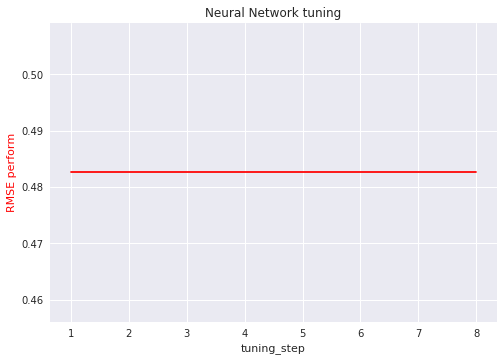

In [471]:
tun_step = np.array([1,2,3,4,5,6,7,8])

fig, ax1 = plt.subplots()

# ax2 = ax1.twinx()
ax1.plot(tun_step, perform_nn, 'r-')
# ax2.plot(budget, cpc, 'b-')

ax1.set_xlabel('tuning_step')
ax1.set_ylabel('RMSE perform', color='r')
# ax2.set_ylabel('CPC improvement', color='b')
plt.title('Neural Network tuning')
plt.show()

In [472]:
MLP = MLPRegressor(hidden_layer_sizes=(100,200,50), activation='relu', solver='adam', \
                   alpha=0.0001, batch_size='auto', learning_rate='constant', \
                   learning_rate_init=0.001, power_t=0.5, max_iter=200,\
                   shuffle=True, random_state=None, tol=0.0001, \
                   verbose=False, warm_start=False, momentum=0.9, \
                   nesterovs_momentum=True, early_stopping=False, validation_fraction=0.1, \
                   beta_1=0.9, beta_2=0.999, epsilon=1e-08)
MLP_model = MLP.fit(cleaned_train,y)
pre_y = BR_model.predict(cleaned_test)

In [473]:
# mapk
total_map['pre_relevance'] = pre_y
test_map = total_map.sort_values(['search_term','relevance'], ascending=[True, False])
pred_map = total_map.sort_values(['search_term','pre_relevance'], ascending=[True, False])
for k in np.arange(1,11,1):
    test_k = test_map.groupby(by='search_term', sort=False).id.apply( lambda x: x.values[:k].tolist()).values.tolist()
    pred_all = pred_map.groupby(by='search_term', sort=False).id.apply( lambda x: x.values.tolist()).values.tolist()
    MAP_score = mapk(test_k, pred_all,k)
    print("MAP_top_",k,":", MAP_score)

MAP_top_ 1 : 0.444593429748
MAP_top_ 2 : 0.588317689876
MAP_top_ 3 : 0.672216369228
MAP_top_ 4 : 0.730343916611
MAP_top_ 5 : 0.776222424417
MAP_top_ 6 : 0.817368626888
MAP_top_ 7 : 0.857261600167
MAP_top_ 8 : 0.894221299045
MAP_top_ 9 : 0.927223225593
MAP_top_ 10 : 0.953761291718


In [479]:
len(MLP_model.coefs_[0])

259

### SVM

In [ ]:
C_range=np.array([1.0,0.5,1.5])
cache_size = np.array([200,300,350,500,250])
perform_svm = []
map_svm = []
for i in C_range:
    for j in cache_size:
        R_svm = svm.SVR(kernel='rbf', degree=3, gamma='auto',\
                    coef0=0.0, tol=0.001, C=1.0, \
                    epsilon=0.1, shrinking=True, cache_size=200,\
                    verbose=False, max_iter=-1)
        SVM_model = R_svm.fit(cleaned_train,y)
        pre_y = SVM_model.predict(cleaned_test)
        # mapk
        total_map['pre_relevance'] = pre_y
        test_map = total_map.sort_values(['search_term','relevance'], ascending=[True, False])
        pred_map = total_map.sort_values(['search_term','pre_relevance'], ascending=[True, False])
        test_k = test_map.groupby(by='search_term', sort=False).id.apply( lambda x: x.values[:3].tolist()).values.tolist()
        pred_all = pred_map.groupby(by='search_term', sort=False).id.apply( lambda x: x.values.tolist()).values.tolist()
        MAP_score = mapk(test_k, pred_all,3)
#       print("MAP_top_",3,":", MAP_score)
        map_svm.append(MAP_score)
        perform_svm.append(rmse(y_truth,pre_y))
        print('C_range',i)
        print('cache_size',)
        print(' ')

In [ ]:
perform_svm

In [ ]:
map_svm

In [ ]:
tun_step = np.array([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15])

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.plot(tun_step, perform_svm, 'r-')
# ax2.plot(budget, cpc, 'b-')

ax1.set_xlabel('tuning_step')
ax1.set_ylabel('RMSE perform', color='r')
# ax2.set_ylabel('CPC improvement', color='b')
plt.title('SVM tuning')
plt.show()

In [ ]:
# mapk
total_map['pre_relevance'] = pre_y
test_map = total_map.sort_values(['search_term','relevance'], ascending=[True, False])
pred_map = total_map.sort_values(['search_term','pre_relevance'], ascending=[True, False])
for k in np.arange(1,11,1):
    test_k = test_map.groupby(by='search_term', sort=False).id.apply( lambda x: x.values[:k].tolist()).values.tolist()
    pred_all = pred_map.groupby(by='search_term', sort=False).id.apply( lambda x: x.values.tolist()).values.tolist()
    MAP_score = mapk(test_k, pred_all,k)
    print("MAP_top_",k,":", MAP_score)

In [ ]:
coef_ 

In [ ]:
#================Plot==================
importances=pd.Series(r_l_model.coef_[r_l_model.coef_!=0.0],index=cleaned_train.columns[r_l_model.coef_!=0.0])
importances.sort_values(inplace=True,ascending=False)
importances.plot(kind="bar", figsize=(10,10));
plt.title('Lasso coef not equal 0')
plt.show()
#---------------------------------------------------

### Bagging

In [132]:
### Random Forest Regression
R_rf = RandomForestRegressor(n_estimators=i, criterion='mse', max_depth=j,\
                              min_samples_split=2, min_samples_leaf=12, min_weight_fraction_leaf=0.0,\
                              max_features=0.55, max_leaf_nodes=None, min_impurity_split=1e-07,\
                              bootstrap=True, oob_score=False, n_jobs=1, \
                              random_state=2017, verbose=0, warm_start=False)

perform_bagg_rf = []
n_es = np.array([10,30,65,95,100])

for k in n_es:
    BR = BaggingRegressor(base_estimator=R_rf, n_estimators=k, max_samples=1.0,\
                          max_features=1.0, bootstrap=True, bootstrap_features=False,\
                          oob_score=False, warm_start=False, n_jobs=1, random_state=None, verbose=0)
    BR_model = BR.fit(cleaned_train,y)
    pre_y = BR_model.predict(cleaned_test)
    perform_bagg_rf.append(rmse(y_truth,pre_y))
    print('n_estimators:',k)
    print(' ')

n_estimators: 165
max_depth: 6
gamma: 0.0
 
n_estimators: 295
max_depth: 6
gamma: 0.0
 
n_estimators: 596
max_depth: 6
gamma: 0.0
 


In [ ]:
perform_bagg_rf

In [ ]:
# mapk
total_map['pre_relevance'] = pre_y
test_map = total_map.sort_values(['search_term','relevance'], ascending=[True, False])
pred_map = total_map.sort_values(['search_term','pre_relevance'], ascending=[True, False])
for k in np.arange(1,11,1):
    test_k = test_map.groupby(by='search_term', sort=False).id.apply( lambda x: x.values[:k].tolist()).values.tolist()
    pred_all = pred_map.groupby(by='search_term', sort=False).id.apply( lambda x: x.values.tolist()).values.tolist()
    MAP_score = mapk(test_k, pred_all,k)
    print("MAP_top_",k,":", MAP_score)

In [ ]:
# Bagging of xgboosting 
XGB = xgb.XGBRegressor(colsample_bytree=0.2,
                       gamma=i, 
                       learning_rate=0.01,
                       max_depth=j,
                       min_child_weight=1.5,
                       n_estimators=f,                                                                  
                       reg_alpha=0.9,
                       reg_lambda=0.7,
                       subsample=0.2,
                       seed=42,
                       silent=1)

perform_bagg_xgb = []
n_es = np.array([10,30,65,95,100])
for k in n_es:
    BR = BaggingRegressor(base_estimator=XGB, n_estimators=k, max_samples=1.0,\
                          max_features=1.0, bootstrap=True, bootstrap_features=False,\
                          oob_score=False, warm_start=False, n_jobs=1, random_state=None, verbose=0)
    BR_model = BR.fit(cleaned_train,y)
    pre_y = BR_model.predict(cleaned_test)
    perform_bagg_xgb.append(rmse(y_truth,pre_y))
    print('n_estimators:',k)
    print(' ')

In [ ]:
perform_bagg_xgb

In [ ]:
# mapk
total_map['pre_relevance'] = pre_y
test_map = total_map.sort_values(['search_term','relevance'], ascending=[True, False])
pred_map = total_map.sort_values(['search_term','pre_relevance'], ascending=[True, False])
for k in np.arange(1,11,1):
    test_k = test_map.groupby(by='search_term', sort=False).id.apply( lambda x: x.values[:k].tolist()).values.tolist()
    pred_all = pred_map.groupby(by='search_term', sort=False).id.apply( lambda x: x.values.tolist()).values.tolist()
    MAP_score = mapk(test_k, pred_all,k)
    print("MAP_top_",k,":", MAP_score)